### Proje 4. Gozetimsiz Ogrenme - Telecom Churn

https://www.kaggle.com/mnassrib/telecom-churn-datasets

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Elimizdeki veri analiz icin %80-%20 seklinde ayrilmisti. Onlari birlestirip tum veri uzerinde calisacagim.

tel1 = pd.read_csv('churn-bigml-80.csv')
tel2 = pd.read_csv('churn-bigml-20.csv')

In [31]:
tel = pd.concat([tel1,tel2])

In [32]:
tel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
# Veri analize hazir oldugu icin icinde kayip deger bulunmuyor.

tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   f

In [34]:
tel.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [35]:
tel.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [36]:
# Iki veri uzerinden gruplarimi olusturacagim icin simdilik onlari ayiriyorum. Bu calisma icin 'day' aramalarinin
# gunduz yapilan aramalar oldugunu varsayarak ilerleyecegim. Gunduz ve gece arama yapan kisiler uzerinden gruplarimi
# olusturacagim.

day = tel['Total day minutes']
night = tel['Total night minutes']

In [38]:
df = pd.concat([day,night], axis=1)
df.head()

,Total day minutes,Total night minutes
0,265.1,244.7
1,161.6,254.4
2,243.4,162.6
3,299.4,196.9
4,166.7,186.9


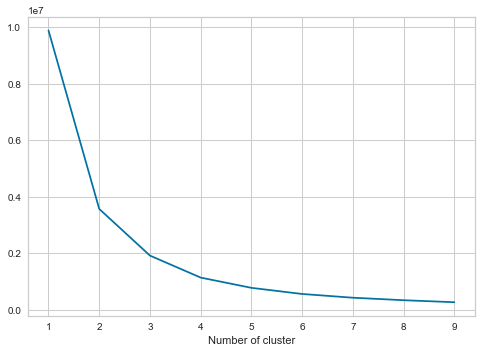

In [39]:
# her iki degisken icin ideal grup sayisina bakacagim

from sklearn.cluster import KMeans

sse={}
day = tel[['Total day minutes']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(day)
    day["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [40]:
# yukaridaki grafik sonucuna gore 4 grup olusturacagim ve bu gruplarin oldugu veriyi yeni bir sutununa atayacagim

kmeans = KMeans(n_clusters=4)
kmeans.fit(tel[['Total day minutes']])
tel['DayCluster'] = kmeans.predict(tel[['Total day minutes']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=True).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tel = order_cluster('DayCluster', 'Total day minutes',tel,False)

In [41]:
tel.groupby('DayCluster')['Total day minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
DayCluster,,,,,,,,
0,487.0,94.042505,24.732856,0.0,82.4,101.10,113.15,123.3
1,1163.0,153.318229,15.473207,123.7,141.3,154.10,166.65,178.8
2,1140.0,204.231842,15.056248,178.9,191.4,203.65,216.80,232.9
3,543.0,261.985820,23.760510,233.2,242.5,256.40,274.35,350.8


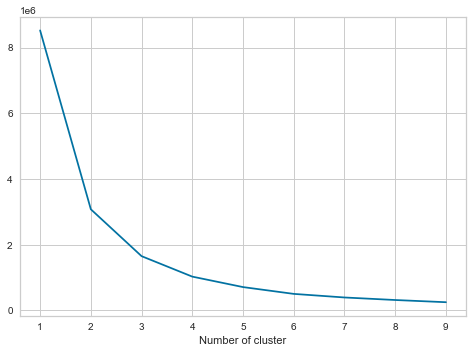

In [42]:
sse={}
night = tel[['Total night minutes']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(night)
    night["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tel[['Total night minutes']])
tel['NightCluster'] = kmeans.predict(tel[['Total night minutes']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=True).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tel = order_cluster('NightCluster', 'Total night minutes',tel,False)

In [44]:
tel.groupby('NightCluster')['Total night minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
NightCluster,,,,,,,,
0,512.0,123.139258,22.975449,23.2,111.575,129.25,141.1,149.5
1,1123.0,176.359573,14.040005,149.7,165.250,177.60,188.9,199.3
2,1120.0,222.616875,13.780192,199.4,210.700,221.60,233.8,248.7
3,578.0,275.218858,23.769065,248.9,257.250,268.35,286.5,395.0


In [45]:
# gruplarin birlesimini veren yeni bir sutun daha atayalim

tel['Score']=tel['DayCluster'].astype(str)+tel['NightCluster'].astype(str)
tel.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,DayCluster,NightCluster,Score
3328,NE,31,415,No,No,0,97.5,129,16.58,260.4,...,100,3.99,7.0,5,1.89,1,False,0,0,00
3329,PA,136,408,No,No,0,102.1,75,17.36,219.5,...,92,3.32,9.8,5,2.65,0,False,0,0,00
3330,NM,112,415,No,No,0,81.6,94,13.87,268.1,...,75,6.34,8.6,18,2.32,1,False,0,0,00
3331,MI,108,408,Yes,No,0,115.1,114,19.57,211.3,...,85,6.12,13.8,3,3.73,2,True,0,0,00
3332,IA,88,415,No,No,0,113.7,67,19.33,165.1,...,142,6.37,10.8,3,2.92,1,False,0,0,00


In [46]:
tel[tel['Score']=="33"].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,DayCluster,NightCluster,Score
2243,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,...,97,14.69,11.2,5,3.02,0,False,3,3,33
2244,AZ,12,408,No,No,0,249.6,118,42.43,252.4,...,90,12.61,11.8,3,3.19,1,True,3,3,33
2245,NJ,138,408,No,No,0,241.8,93,41.11,170.5,...,104,13.29,11.8,7,3.19,3,False,3,3,33
2246,DC,82,415,No,No,0,300.3,109,51.05,181.0,...,73,12.15,11.7,4,3.16,0,True,3,3,33
2247,ME,78,415,No,No,0,252.9,93,42.99,178.4,...,105,11.88,9.5,7,2.57,3,False,3,3,33


In [47]:
# simdi elimizdeki veri uzerinden gruplarimizi adlandirabiliriz

seg_map={r'00':'At Risk',
        r'33':'Champions',
        r'[1-2][1-2]':'No Risk',
        r'03':'Night Owls',
        r'30':'Morning Stars',
        r'0[1-2]':'Potential Night',
        r'[1-2]0':'Potential Morning',
        r'[1-2]3':'No Risk',
        r'3[1-2]':'No Risk'}

In [48]:
tel['Segment']=tel['Score'].replace(seg_map, regex=True)
tel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,DayCluster,NightCluster,Score,Segment
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,3,2,32,No Risk
1,GA,70,415,No,Yes,24,249.5,101,42.42,259.7,...,10.02,9.8,4,2.65,1,False,3,2,32,No Risk
2,NJ,128,415,No,No,0,237.9,125,40.44,247.6,...,9.40,13.9,4,3.75,1,True,3,2,32,No Risk
3,VT,103,510,No,No,0,246.5,47,41.91,195.5,...,9.02,11.7,4,3.16,1,False,3,2,32,No Risk
4,DE,92,415,No,Yes,33,243.1,92,41.33,213.8,...,10.29,12.1,2,3.27,2,False,3,2,32,No Risk


In [50]:
# son olarak olusturdugumuz gruplarin nasil ayrildigina bakalim

tel[['Segment','Total day minutes','Total night minutes']].groupby(['Segment']).agg(['mean', 'median','count'])

Total day minutes               Total night minutes         \
                               mean  median count                mean median   
Segment                                                                        
At Risk                   93.171831   98.20    71          123.116901  132.6   
Champions                263.349524  255.90   105          273.972381  268.8   
Morning Stars            262.044186  260.35    86          123.053488  127.0   
Night Owls                97.736986  104.90    73          270.998630  263.4   
No Risk                  191.001217  187.25  2300          212.940217  209.5   
Potential Morning        180.003944  182.10   355          123.164507  129.6   
Potential Night           93.436443   99.60   343          198.678426  196.1   

                         
                  count  
Segment                  
At Risk              71  
Champions           105  
Morning Stars        86  
Night Owls           73  
No Risk            2300  
Potential Morning   355  
Potential Night     343